In [1]:
import findspark
findspark.init()

In [2]:
from pyspark.sql import SparkSession

spark = SparkSession.builder. \
    appName("pyspark-1"). \
    getOrCreate()

### Read data

In [3]:
# upon first inspecting the dataframe using default load options, we find that the data is not parsed correctly. adding quotes option solved it
df = spark.read.options(header=True, inferSchema=True)\
.option("quote", "\"")\
.option("escape", "\"")\
.csv("/dataset/nyc-jobs.csv")
df.printSchema()

root
 |-- Job ID: integer (nullable = true)
 |-- Agency: string (nullable = true)
 |-- Posting Type: string (nullable = true)
 |-- # Of Positions: integer (nullable = true)
 |-- Business Title: string (nullable = true)
 |-- Civil Service Title: string (nullable = true)
 |-- Title Code No: string (nullable = true)
 |-- Level: string (nullable = true)
 |-- Job Category: string (nullable = true)
 |-- Full-Time/Part-Time indicator: string (nullable = true)
 |-- Salary Range From: double (nullable = true)
 |-- Salary Range To: double (nullable = true)
 |-- Salary Frequency: string (nullable = true)
 |-- Work Location: string (nullable = true)
 |-- Division/Work Unit: string (nullable = true)
 |-- Job Description: string (nullable = true)
 |-- Minimum Qual Requirements: string (nullable = true)
 |-- Preferred Skills: string (nullable = true)
 |-- Additional Information: string (nullable = true)
 |-- To Apply: string (nullable = true)
 |-- Hours/Shift: string (nullable = true)
 |-- Work Locat

In [4]:
# check if data is read correctly
# opportunity to add a test 
# df.groupBy('Process Date').count().show()

# EDA

In [5]:
# basic statistics
pandas_df = df.toPandas()
pandas_df.describe()

,Job ID,# Of Positions,Salary Range From,Salary Range To
count,2946.000000,2946.000000,2946.000000,2946.000000
mean,384821.563136,2.495927,58904.139794,85535.711627
std,53075.338977,9.281313,26986.575936,42871.313454
min,87990.000000,1.000000,0.000000,10.360000
25%,378496.750000,1.000000,49390.000000,62000.000000
50%,404382.000000,1.000000,58440.000000,82056.000000
75%,419974.250000,1.000000,73171.750000,106222.000000
max,426238.000000,200.000000,218587.000000,234402.000000


In [6]:
# dataframe quality
pandas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2946 entries, 0 to 2945
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Job ID                         2946 non-null   int32         
 1   Agency                         2946 non-null   object        
 2   Posting Type                   2946 non-null   object        
 3   # Of Positions                 2946 non-null   int32         
 4   Business Title                 2946 non-null   object        
 5   Civil Service Title            2946 non-null   object        
 6   Title Code No                  2946 non-null   object        
 7   Level                          2946 non-null   object        
 8   Job Category                   2944 non-null   object        
 9   Full-Time/Part-Time indicator  2751 non-null   object        
 10  Salary Range From              2946 non-null   float64       
 11  Salary Range To  

In [7]:
df.show(2)

+------+--------------------+------------+--------------+--------------------+--------------------+-------------+-----+------------+-----------------------------+-----------------+---------------+----------------+-------------------+--------------------+--------------------+-------------------------+--------------------+----------------------+--------------------+-----------+---------------+-------------------+---------------------+-------------------+----------+-------------------+-------------------+
|Job ID|              Agency|Posting Type|# Of Positions|      Business Title| Civil Service Title|Title Code No|Level|Job Category|Full-Time/Part-Time indicator|Salary Range From|Salary Range To|Salary Frequency|      Work Location|  Division/Work Unit|     Job Description|Minimum Qual Requirements|    Preferred Skills|Additional Information|            To Apply|Hours/Shift|Work Location 1|Recruitment Contact|Residency Requirement|       Posting Date|Post Until|    Posting Updated|     

In [8]:
constant_col = []
for i in pandas_df.columns:
    if len(pandas_df[i].unique()) == 1:
        print('{} is a column which only has value {}'.format(i,pandas_df[i].unique()))
        constant_col.append(i)
        
# Recruitment Contact is null, we can drop

Recruitment Contact is a column which only has value [None]


In [9]:
pandas_df['Process Date'].unique()

array(['2019-12-17T00:00:00.000000000',                           'NaT'],
      dtype='datetime64[ns]')

In [10]:
# distincy categorical values - visualize 
numerical_columns = [i for i in pandas_df.columns if (pandas_df[i].dtypes == "float64" or pandas_df[i].dtypes == "int32")]
categorical_columns = [i for i in pandas_df.columns if pandas_df[i].dtypes == "object"]

In [11]:
# plots to understand the distinct values in categorical columns 
# for each categorical column, count how many distinct values there are, and plot the top 10 

In [12]:
distinctvalues = df.select("Job Category").distinct()
distinctvalues.count()

131

In [13]:
distinctvalues = df.select("Agency").distinct()
distinctvalues.show(10)

+--------------------+
|              Agency|
+--------------------+
|LANDMARKS PRESERV...|
|OFFICE OF COLLECT...|
|     FIRE DEPARTMENT|
|ADMIN FOR CHILDRE...|
|MANHATTAN COMMUNI...|
|      TAX COMMISSION|
|HRA/DEPT OF SOCIA...|
|TAXI & LIMOUSINE ...|
|EQUAL EMPLOY PRAC...|
|DEPARTMENT OF BUS...|
+--------------------+
only showing top 10 rows



In [14]:
# Higest salary posting per agency

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:132: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  fig.canvas.print_figure(bytes_io, **kw)


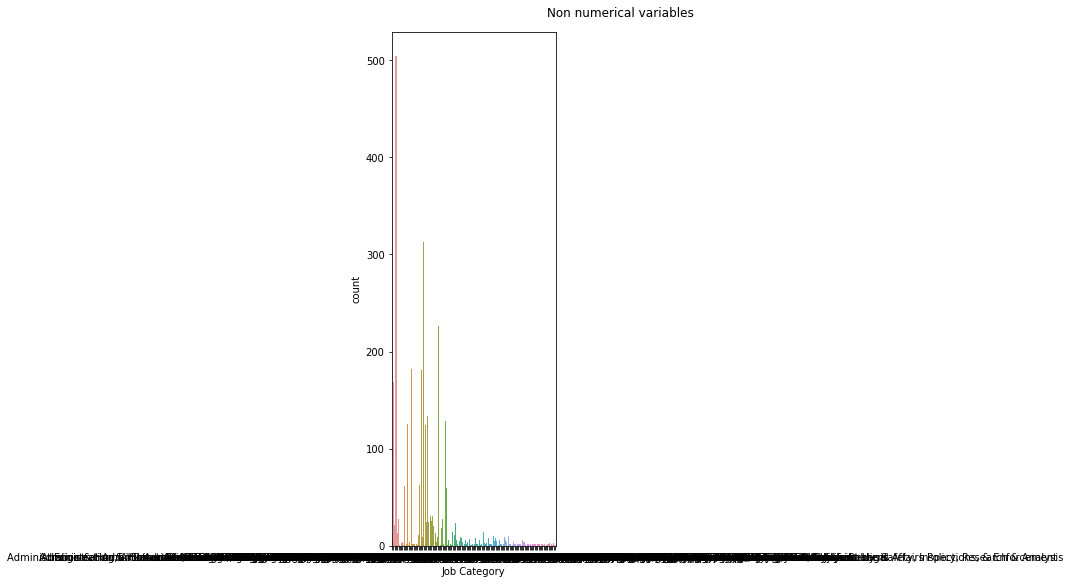

In [67]:
fig, axs = plt.subplots(constrained_layout=True)
fig.set_size_inches(12, 8)
fig.suptitle('Non numerical variables')

sns.countplot(
        data=pandas_df,
        x='Job Category'
    )
plt.show()

In [65]:
df.groupBy("Job Category").count().sort("count",ascending=False).take(10)

[Row(Job Category='Engineering, Architecture, & Planning', count=504),
 Row(Job Category='Technology, Data & Innovation', count=313),
 Row(Job Category='Legal Affairs', count=226),
 Row(Job Category='Public Safety, Inspections, & Enforcement', count=182),
 Row(Job Category='Building Operations & Maintenance', count=181),
 Row(Job Category='Finance, Accounting, & Procurement', count=169),
 Row(Job Category='Administration & Human Resources', count=134),
 Row(Job Category='Constituent Services & Community Programs', count=129),
 Row(Job Category='Health', count=125),
 Row(Job Category='Policy, Research & Analysis', count=124)]

In [10]:
# unprocessed continuous values 
# no null in salary column
# add columns salary_floor_hourly and salary_ceiling_hourly
# assumption: 8 working hours per day, 22 working days per month 
# annual salary -> salary / (22*12*8)
# daily salary -> salary / (8)

In [16]:
df.select('Salary Frequency').distinct().show()

+----------------+
|Salary Frequency|
+----------------+
|          Annual|
|           Daily|
|          Hourly|
+----------------+



In [5]:
from pyspark.sql.types import *
from pyspark.sql.functions import *


In [6]:
# def salary_converter(frequency: StringType) -> int:
#     annual_working_hours = 2112  # 12*22*8 12 months * 22 days * 8 hours 
#     daily_working_hours = 8 
# #     if frequency == 'Annual':
# #         return annual_working_hours
# #     elif frequency == 'Daily':
# #         return daily_working_hours
# #     else:
# #         return 1 
#     return 1 

# didn't use udf because it's expensive 

In [7]:
normalized_salary_df = df.\
withColumn("hourly_salary_floor",
           expr("""`Salary Range From`/(case when `Salary Frequency` = 'Annual' then 2112 
                           when `Salary Frequency` = 'Daily' then 8 
                           else 1 end)""")).\
withColumn("hourly_salary_ceil",
           expr("""`Salary Range To`/(case when `Salary Frequency` = 'Annual' then 2112 
                           when `Salary Frequency` = 'Daily' then 8 
                           else 1 end)"""))



In [7]:
# normalized_salary_df.show(1)

In [8]:
# normalized_salary_df.select('Salary Frequency','hourly_salary_floor').distinct().show()

In [19]:
# Salary distribution per job category 
normalized_salary_df.\
select('hourly_salary_floor', 'hourly_salary_ceil')
# .\
# filter(col('Job Category')=='Engineering, Architecture, & Planning').show(20)

DataFrame[hourly_salary_floor: double, hourly_salary_ceil: double]

In [20]:
salary_plot_df = normalized_salary_df.\
select('Job Category','hourly_salary_floor', 'hourly_salary_ceil').toPandas()
# filter(col('Job Category')=='Technology, Data & Innovation').toPandas()

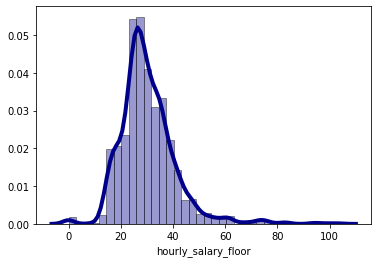

In [24]:
sns.distplot(salary_plot_df['hourly_salary_floor'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

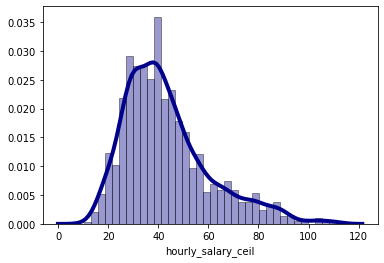

In [25]:
sns.distplot(salary_plot_df['hourly_salary_ceil'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

Text(0, 0.5, 'Density')

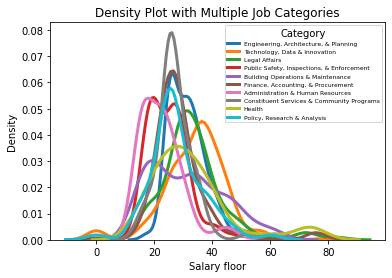

In [26]:
categories = ['Engineering, Architecture, & Planning',
              'Technology, Data & Innovation',
              'Legal Affairs',
              'Public Safety, Inspections, & Enforcement',
              'Building Operations & Maintenance',
              'Finance, Accounting, & Procurement',
              'Administration & Human Resources',
              'Constituent Services & Community Programs',
              'Health',
              'Policy, Research & Analysis']

# Iterate through the five airlines
for category in categories:
    # Subset to the airline
    subset = salary_plot_df[salary_plot_df['Job Category'] == category]
    
    # Draw the density plot
    sns.distplot(subset['hourly_salary_floor'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = category)
    
# Plot formatting
plt.legend(prop={'size': 6}, title = 'Category')
plt.title('Density Plot with Multiple Job Categories')
plt.xlabel('Salary floor')
plt.ylabel('Density')

In [27]:
# impute missing values 

In [14]:
# df.show(1)

In [21]:
# skills_df = df.select('hourly_salary_ceil','Prefered Skills').
# normalized_salary_df.groupBy('Preferred Skills').agg(avg('hourly_salary_ceil').alias('salary')).sort('salary',ascending=False).take(10)

# Outliers

In [6]:
# 

In [22]:
normalized_salary_df.select('Level', 'Business Title','Job Category').filter(col('hourly_salary_ceil')>100).show(5)

+-----+--------------------+--------------------+
|Level|      Business Title|        Job Category|
+-----+--------------------+--------------------+
|   M7| EVP for Real Estate|Policy, Research ...|
|   M7| EVP for Real Estate|Policy, Research ...|
|   M7|ADMINISTRATIVE MA...|Administration & ...|
|   M7|ADMINISTRATIVE MA...|Administration & ...|
|   M6|Deputy Commission...|              Health|
+-----+--------------------+--------------------+
only showing top 5 rows



# Missing values

In [29]:
pandas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2946 entries, 0 to 2945
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Job ID                         2946 non-null   int32         
 1   Agency                         2946 non-null   object        
 2   Posting Type                   2946 non-null   object        
 3   # Of Positions                 2946 non-null   int32         
 4   Business Title                 2946 non-null   object        
 5   Civil Service Title            2946 non-null   object        
 6   Title Code No                  2946 non-null   object        
 7   Level                          2946 non-null   object        
 8   Job Category                   2944 non-null   object        
 9   Full-Time/Part-Time indicator  2751 non-null   object        
 10  Salary Range From              2946 non-null   float64       
 11  Salary Range To  

In [33]:
# Impute missing values

In [36]:
df.select('Civil Service Title').filter(isnull(col('Job Category'))).show()


KeyboardInterrupt



In [ ]:
Full-Time/Part-Time indicator  2751 


In [4]:
df.groupBy('Salary Frequency','Full-Time/Part-Time indicator').count().show()

+----------------+-----------------------------+-----+
|Salary Frequency|Full-Time/Part-Time indicator|count|
+----------------+-----------------------------+-----+
|          Annual|                         null|  187|
|          Hourly|                            P|  108|
|          Hourly|                            F|   79|
|          Annual|                            P|   17|
|           Daily|                            F|   38|
|          Annual|                            F| 2508|
|          Hourly|                         null|    8|
|           Daily|                            P|    1|
+----------------+-----------------------------+-----+



In [32]:
# missing less than x percent: fill with ' '

In [ ]:
# missing more than half: drop 

# Drop columns

In [36]:
df_drop = df.drop('Job ID','Recruitment Contact')

In [37]:
df_drop.printSchema()

root
 |-- Agency: string (nullable = true)
 |-- Posting Type: string (nullable = true)
 |-- # Of Positions: integer (nullable = true)
 |-- Business Title: string (nullable = true)
 |-- Civil Service Title: string (nullable = true)
 |-- Title Code No: string (nullable = true)
 |-- Level: string (nullable = true)
 |-- Job Category: string (nullable = true)
 |-- Full-Time/Part-Time indicator: string (nullable = true)
 |-- Salary Range From: double (nullable = true)
 |-- Salary Range To: double (nullable = true)
 |-- Salary Frequency: string (nullable = true)
 |-- Work Location: string (nullable = true)
 |-- Division/Work Unit: string (nullable = true)
 |-- Job Description: string (nullable = true)
 |-- Minimum Qual Requirements: string (nullable = true)
 |-- Preferred Skills: string (nullable = true)
 |-- Additional Information: string (nullable = true)
 |-- To Apply: string (nullable = true)
 |-- Hours/Shift: string (nullable = true)
 |-- Work Location 1: string (nullable = true)
 |-- Re

In [ ]:
Recruitment Contact     

In [ ]:
Post Until  

In [ ]:
Job ID,   Title Code No        

# Encoding categorical columns

This part is quite different from python sci-kit learn

In [38]:
from pyspark.ml.feature import (VectorAssembler,VectorIndexer,
                                OneHotEncoder,StringIndexer)

In [44]:
indexer = StringIndexer(inputCol='Agency',outputCol='AgencyIndex').fit(df)
indexed_df = indexer.transform(df)


In [47]:
indexed_df.select('Job ID','Job Category','Salary Range From','AgencyIndex').show(10)

+------+--------------------+-----------------+-----------+
|Job ID|        Job Category|Salary Range From|AgencyIndex|
+------+--------------------+-----------------+-----------+
| 87990|                null|          42405.0|       15.0|
| 97899|                null|          60740.0|       15.0|
|132292|Maintenance & Ope...|         51907.68|        1.0|
|132292|Maintenance & Ope...|         51907.68|        1.0|
|133921|Maintenance & Ope...|             35.0|        1.0|
|133921|Maintenance & Ope...|             35.0|        1.0|
|137433|Finance, Accounti...|          50598.0|        2.0|
|138531|Health Public Saf...|          50623.0|        0.0|
|151131|Engineering, Arch...|          90000.0|        1.0|
|152738|Clerical & Admini...|          30683.0|        8.0|
+------+--------------------+-----------------+-----------+
only showing top 10 rows



In [49]:
encoder = OneHotEncoder(inputCol='AgencyIndex',outputCol='AgencyVec')
encoded_df = encoder.transform(indexed_df)

In [50]:
encoded_df.select('Job ID','Job Category','Salary Range From','AgencyIndex','AgencyVec').show(10)

+------+--------------------+-----------------+-----------+---------------+
|Job ID|        Job Category|Salary Range From|AgencyIndex|      AgencyVec|
+------+--------------------+-----------------+-----------+---------------+
| 87990|                null|          42405.0|       15.0|(51,[15],[1.0])|
| 97899|                null|          60740.0|       15.0|(51,[15],[1.0])|
|132292|Maintenance & Ope...|         51907.68|        1.0| (51,[1],[1.0])|
|132292|Maintenance & Ope...|         51907.68|        1.0| (51,[1],[1.0])|
|133921|Maintenance & Ope...|             35.0|        1.0| (51,[1],[1.0])|
|133921|Maintenance & Ope...|             35.0|        1.0| (51,[1],[1.0])|
|137433|Finance, Accounti...|          50598.0|        2.0| (51,[2],[1.0])|
|138531|Health Public Saf...|          50623.0|        0.0| (51,[0],[1.0])|
|151131|Engineering, Arch...|          90000.0|        1.0| (51,[1],[1.0])|
|152738|Clerical & Admini...|          30683.0|        8.0| (51,[8],[1.0])|
+------+----

# Text processing

In [8]:
# remove punctuations and special characters, and convert everything to lower case
# Job Description, Minimum Qual Requirements, Preferred Skills
from pyspark.sql.functions import lower, col, concat, regexp_replace

text_cleaned_df = normalized_salary_df.\
withColumn('Job Description',lower(regexp_replace(col('Job Description'), "[^a-zA-Z0-9 ]", ""))).\
withColumn('Minimum Qual Requirements',lower(regexp_replace(col('Minimum Qual Requirements'), "[^a-zA-Z0-9 ]", ""))).\
withColumn('Preferred Skills',lower(regexp_replace(col('Preferred Skills'), "[^a-zA-Z0-9 ]", "")))


In [9]:
text_cleaned_df.select('Job Description','Minimum Qual Requirements').show(1)

+--------------------+-------------------------+
|     Job Description|Minimum Qual Requirements|
+--------------------+-------------------------+
|division of econo...|     1a baccalaureate ...|
+--------------------+-------------------------+
only showing top 1 row



In [10]:
text_cleaned_df.filter(col('Minimum Qual Requirements').contains('high school')).count()


1350

In [11]:
# Dic containing degrees
degrees = {
    'high school':['high school'],
    'bachelor':['baccalaureate','bachelor'],
    'master': ['master'],
    'doctorate':['phd','scd'],
    'legal degree':['state bar']
}

In [12]:
cleaned_df_degree = text_cleaned_df.\
withColumn('degree_required',
           expr("""case when `Minimum Qual Requirements` like '%phd%' or `Minimum Qual Requirements` like '%scd%'
                        then 'doctorate' 
                    when `Minimum Qual Requirements` like '%master%'
                    then 'master'
                    when `Minimum Qual Requirements` like '%baccalaureate%' or  `Minimum Qual Requirements` like '%bachelor%'
                    then 'bachelor'
                    when `Minimum Qual Requirements` like '%high school%'
                    then 'high school'
                    when `Minimum Qual Requirements` like '%state bar%'
                    then 'legal degree'
                    else 'No degree requirement'
                end"""))


In [13]:
# cleaned_df_degree.select('Minimum Qual Requirements','Business Title','degree_required').take(5)

In [14]:
# correlation between degree and salary 

In [18]:
cleaned_df_degree.groupBy('degree_required').agg(avg('hourly_salary_ceil').alias('avg_salary'),
                                                max('hourly_salary_ceil').alias('max_salary'),
                                                min('hourly_salary_ceil').alias('min_salary')
                                                ).show()

+--------------------+------------------+------------------+------------------+
|     degree_required|        avg_salary|        max_salary|        min_salary|
+--------------------+------------------+------------------+------------------+
|No degree require...| 43.16766260539278|110.98579545454545|             10.36|
|           doctorate| 85.22727272727273| 85.22727272727273| 85.22727272727273|
|              master| 48.81057772022551|110.98579545454545|24.401041666666668|
|        legal degree|46.499655712530696| 92.04308712121212| 31.87215909090909|
|         high school|29.706092822096814|             58.54|16.053977272727273|
|            bachelor| 42.21221909482545|110.98579545454545|18.546401515151516|
+--------------------+------------------+------------------+------------------+



In [111]:
# skills
# concatenate job description and preferred skills
cleaned_df_skills = cleaned_df_degree.withColumn('skills_raw',col('Preferred Skills'))
cleaned_df_skills_non_null = cleaned_df_skills.na.fill('na')

In [110]:
cleaned_df_skills_non_null.count()

2946

In [112]:
from pyspark.ml.feature import StopWordsRemover, Tokenizer

tokenizer = Tokenizer(inputCol="skills_raw", outputCol="skills_words")
cleaned_df_skills_non_null = tokenizer.transform(cleaned_df_skills_non_null)


In [115]:
remover = StopWordsRemover(inputCol='skills_words', outputCol='filtered_skills')
cleaned_df_skills_non_null = remover.transform(cleaned_df_skills_non_null)

In [116]:
cleaned_df_skills_non_null.select('skills_words').take(10)

[Row(skills_words=['excellent', 'interpersonal', 'and', 'organizational', 'skills', '', 'excellent', 'analytic', 'and', 'operational', 'skills', '', 'excellent', 'writing', 'and', 'editing', 'skills', '', 'knowledge', 'of', 'government', 'procurement', 'processes', 'and', 'information', 'systems', 'desirable', '', 'foreign', 'language', 'skills', 'a', 'plus']),
 Row(skills_words=['na']),
 Row(skills_words=['1', '', 'a', 'high', 'school', 'diploma', 'or', 'ged', '', '2', '', 'cdl', 'drivers', 'license', '', '3', '', 'excellent', 'troubleshooting', 'ability', 'and', 'mechanical', 'aptitude', '', '4', '', 'excellent', 'analytical', 'and', 'organizational', 'skills', '', '5', '', 'ability', 'to', 'troubleshoot', 'various', 'types', 'of', 'vacuum', 'heating', 'equipment', '', '6', '', 'knowledge', 'of', 'steam', 'and', 'pneumatic', 'heating', 'systems', 'steam', 'and', 'hot', 'water', 'generating', 'systems', 'various', 'types', 'of', 'heat', 'air', 'and', 'water', 'pumps', '', '7', '', 'kn

In [82]:
cleaned_df_skills.select('Job ID','hourly_salary_floor',explode('skills_words')).show(1)

+------+-------------------+---------+
|Job ID|hourly_salary_floor|      col|
+------+-------------------+---------+
| 87990|          20.078125|excellent|
+------+-------------------+---------+
only showing top 1 row



In [54]:
cleaned_df_skills.printSchema()

root
 |-- Job ID: integer (nullable = true)
 |-- Agency: string (nullable = true)
 |-- Posting Type: string (nullable = true)
 |-- # Of Positions: integer (nullable = true)
 |-- Business Title: string (nullable = true)
 |-- Civil Service Title: string (nullable = true)
 |-- Title Code No: string (nullable = true)
 |-- Level: string (nullable = true)
 |-- Job Category: string (nullable = true)
 |-- Full-Time/Part-Time indicator: string (nullable = true)
 |-- Salary Range From: double (nullable = true)
 |-- Salary Range To: double (nullable = true)
 |-- Salary Frequency: string (nullable = true)
 |-- Work Location: string (nullable = true)
 |-- Division/Work Unit: string (nullable = true)
 |-- Job Description: string (nullable = true)
 |-- Minimum Qual Requirements: string (nullable = true)
 |-- Preferred Skills: string (nullable = true)
 |-- Additional Information: string (nullable = true)
 |-- To Apply: string (nullable = true)
 |-- Hours/Shift: string (nullable = true)
 |-- Work Locat

In [ ]:
non_skill_words = ['experience','knowledge','desirable','skill','skills','plus',
                   'technology','organization','strong']

### Sample function

In [ ]:
# read dataset
# 

In [78]:
def get_salary_frequency(df: DataFrame) -> list:
    row_list = df.select('Salary Frequency').distinct().collect()
    return [row['Salary Frequency'] for row in row_list]

NameError: name 'DataFrame' is not defined

Normalize salary function

# CREATE A SUMMARY OF TECHNIQUES AND WORKFLOW

### Example of test function

In [65]:
mock_data = [('A', 'Annual'), ('B', 'Daily')]
expected_result = ['Annual', 'Daily']

In [66]:
def test_get_salary_frequency(mock_data: list, 
                              expected_result: list,
                              schema: list = ['id', 'Salary Frequency']):  
    mock_df = spark.createDataFrame(data = mock_data, schema = schema)
    assert get_salary_frequency(mock_df) == expected_result

In [74]:
# test read dataset

In [ ]:
# Normalize salary test 